In [14]:
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout , LeakyReLU
from sklearn.metrics import classification_report,confusion_matrix
import random

In [16]:
#df_train=pd.read_csv(r"C:\Users\hp\RealTimeSignLanguageDetection\sign_mnist_train\sign_mnist_train.csv")
#df_test=pd.read_csv(r"C:\Users\hp\RealTimeSignLanguageDetection\sign_mnist_test\sign_mnist_test.csv")
df_train=pd.read_csv('/content/sign_mnist_train.csv')
df_test=pd.read_csv('/content/sign_mnist_test.csv')
y_train=df_train['label'].values
y_test=df_test['label'].values
df_train.drop('label',axis=1,inplace=True)
df_test.drop('label',axis=1,inplace=True)
df_test.head()
df_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [17]:
# Label Encoding 
from keras.utils.np_utils import to_categorical 

NumberofClass = 30
y_train = to_categorical(y_train, num_classes = NumberofClass)
y_test = to_categorical(y_test, num_classes = NumberofClass)

In [18]:
x_train=df_train.values
x_test=df_test.values
unique_val = np.array(y_train)
np.unique(unique_val)

array([0., 1.], dtype=float32)

In [19]:
x_train=np.array(x_train.reshape(-1,28,28,1))
x_test=np.array(x_test.reshape(-1,28,28,1))

In [20]:
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [21]:
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


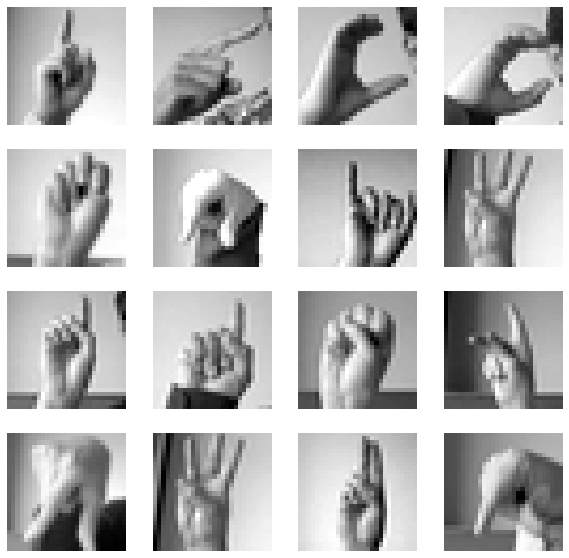

In [22]:
plt.figure(figsize=(10,10)) 

for i in range(16):
    plt.subplot(4,4,i+1)   
    plt.imshow(x_train[i,:,:,0], cmap = "gray")
    plt.axis("off")

plt.show()

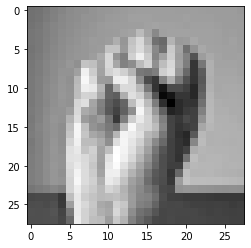

In [23]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10].reshape(28,28),cmap='gray')

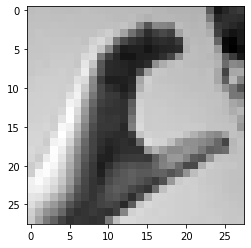

In [24]:
plt.imshow(x_train[2][:,:,0],cmap='gray')
plt.show()

In [25]:
x_train=x_train/255
x_test=x_test/255

In [32]:
batch_size = 128
num_classes = 30
epochs = 50

In [33]:
model = Sequential()


model.add(Conv2D(filters = 128, kernel_size = (4,4), padding = "Same", activation = "relu", input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (4,4), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16, kernel_size = (4,4), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(units = 512, activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(units = num_classes, activation = "softmax"))

model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       2176      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        131136    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 32)          32800     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 32)        

In [34]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [35]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%  0,1 best
        width_shift_range=0.1,  # randomly shift images horizontally 10%  +++
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [36]:
filepath="Sign_language_detection.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, mode='max',patience=3)
callbacks_list = [checkpoint]

In [37]:
# Fit the model
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // batch_size , callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
214/214 [==============================] - ETA: 0s - loss: 2.7258 - accuracy: 0.1621
Epoch 00001: val_accuracy improved from -inf to 0.55382, saving model to Sign_language_detection.hdf5
214/214 [==============================] - 187s 871ms/step - loss: 2.7258 - accuracy: 0.1621 - val_loss: 1.4080 - val_accuracy: 0.5538
Epoch 2/10
214/214 [==============================] - ETA: 0s - loss: 1.2526 - accuracy: 0.5659
Epoch 00002: val_accuracy improved from 0.55382 to 0.71096, saving model to Sign_language_detection.hdf5
214/214 [==============================] - 186s 871ms/step - loss: 1.2526 - accuracy: 0.5659 - val_loss: 0.7742 - val_accuracy: 0.7110
Epoch 3/10
214/214 [==============================] - ETA: 0s - loss: 0.6711 - accuracy: 0.7647
Epoch 00003: val_accuracy improved from 0.71096 to 0.85053, saving model to Sign_language_detection.hdf5
214/214 [==============================] - 186s 868ms/step - loss: 0.6711 - accuracy: 0.7647 - val_loss: 0.3681 - val_accuracy: 0.

In [38]:
model.save('sign_language.h5')

In [72]:
import cv2
from keras.preprocessing.image import img_to_array
alphabet=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
def classify(image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    proba=model.predict(image)
    idx = np.argmax(proba)
    return alphabet[idx]

In [40]:
classify(x_train[3]*255)

'C'

In [41]:
print(y_train[3])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [42]:
y_pred = model.predict(x_test)

y_pred2 = np.array([np.argmax(y_pred[i]) for i in range(len(y_pred))])
y_test2 = np.array([np.argmax(y_test[i]) for i in range(len(y_test))])

In [ ]:
import seaborn as sns

plt.figure(figsize = (15,15))

sns.heatmap(confusion_matrix(y_test2,y_pred2),annot= True,cbar = False , cmap = 'Blues',annot_kws={'size' : 8})
plt.xlabel('Predicted',fontdict={'size': 20})
plt.ylabel('True' ,fontdict={'size': 20})
plt.title('Confusion Matrix',fontdict={'size': 20,'color':'Blue'})
plt.show()

In [43]:
!pip install flask_ngrok

In [44]:
!pip install pyngrok

In [ ]:
#Correct Code
from flask import Flask, render_template, request
from tensorflow.keras.models import load_model
import numpy as np
import os
from flask_ngrok import run_with_ngrok
from tensorflow.keras.preprocessing import image

app = Flask(__name__)
run_with_ngrok(app)   


model = load_model('sign_language.h5')

dic = {0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D', 4 : 'E', 5 : 'F', 6 : 'G', 7 : 'H',8 : 'I', 9 : 'K',
       10 : 'L', 11 : 'M', 12 : 'N', 13 : 'O', 14 : 'P', 15 : 'Q', 16 : 'R', 17 : 'S', 18 : 'T', 19 : 'U',
       20 : 'V', 21 : 'W', 22 : 'X', 23 : 'Y'}

model.make_predict_function()

@app.route("/", methods=['GET', 'POST'])
def main():
	return render_template("index.html")


@app.route("/submit", methods = ['GET', 'POST'])
def get_output():
  if request.method == 'POST':
    img = request.files['my_image']
    img_path = "static/" + img.filename	
    img.save(img_path)
    print(img_path)
    image=cv2.imread(img_path)
    img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    p = classify(img)
    return render_template("index.html", prediction = p)

if __name__ == '__main__':
	app.run()



In [ ]:
#Correct code for testing purpose
from google.colab.patches import cv2_imshow
img_path='/content/static/C letter 1.png'
img = cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
classify(img)

In [ ]:
#ignore the code below
from flask import Flask, render_template, request
from tensorflow.keras.models import load_model
import numpy as np
import os
from flask_ngrok import run_with_ngrok
from tensorflow.keras.preprocessing import image

app = Flask(__name__)
run_with_ngrok(app)   


model = load_model('sign_language.h5')

dic = {0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D', 4 : 'E', 5 : 'F', 6 : 'G', 7 : 'H',8 : 'I', 9 : 'K',
       10 : 'L', 11 : 'M', 12 : 'N', 13 : 'O', 14 : 'P', 15 : 'Q', 16 : 'R', 17 : 'S', 18 : 'T', 19 : 'U',
       20 : 'V', 21 : 'W', 22 : 'X', 23 : 'Y'}

model.make_predict_function()

@app.route("/", methods=['GET', 'POST'])
def main():
	return render_template("index.html")


@app.route("/submit", methods = ['GET', 'POST'])
def get_output():
  if request.method == 'POST':
    img = request.files['my_image']
    img_path = "static/" + img.filename	
    img.save(img_path)
    print(img_path)
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    p = classify(image)
    return render_template("index.html", prediction = p)

@app.route('/predict',methods=['GET','POST'])
def upload():
      if request.form == 'POST':
         img = request.files['my_image']
         img_path = "static/" + img.filename	
         img.save(img_path)
         image = cv2.imread(img_path)
         image= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
         #cv2_imshow(img)
         result= classify(image)
         return render_template("index.html", prediction = result)

if __name__ == '__main__':
	app.run()

